# Моделирование при проектировании информационных систем

### Выполнила: Копосова Дарья Андреевна
### М9121-09.04.04рпис


В данной документы представлены варианты обработки данных, которые я реализовала на примере нескольких наборов данных по данной дисциплине.

#Предварительная обработка данных
###Для чего необходимо производить очистку данных
###В процессе машинного обучения следует производить предварительную обработку имеющейся информации. Это необходимо для ее адаптации в более читабельный вид для компьютера. Из разноформатных сырых сведений, извлекаются единые «признаки», которые могут быть легко интерпретированы алгоритмами машинного обучения.


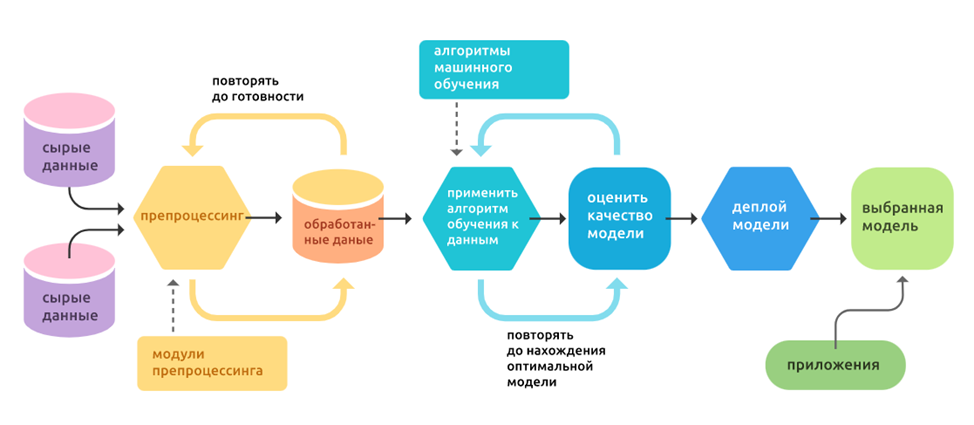

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Импорт необходимых библиотек

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 Импорт набора данных
 1. Medical Cost Personal Datasets https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv
 2.Medical Transcriptions https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions
 3.Medical Appointment No Shows https://www.kaggle.com/datasets/joniarroba/noshowappointments

In [61]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

Данные из 1 DataSet: Medical Cost Personal Datasets

In [62]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


In [63]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(3), int

По данным выше можно отследить сколько пыстых значений в наборе данных
###Например, всего 1338 объекта. Колонка age имеет 1335 не пустых значений. Следовательно 3 объекта имееют пропуск в колонке возраст.

Данные из 2 DataSet: Medical Transcriptions

In [64]:
dataset2.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [65]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4997 non-null   float64
 1   description        4976 non-null   object 
 2   medical_specialty  4988 non-null   object 
 3   sample_name        4982 non-null   object 
 4   transcription      4958 non-null   object 
 5   keywords           3844 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4997 non-null   float64
 1   description        4976 non-null   object 
 2   medical_specialty  4988 non-null   object 
 3   sample_name        4982 non-null   object 
 4   transcription      4958 non-null   object 
 5   keywords 

Данные из 3 DataSet: Medical Appointment No Shows

In [66]:
dataset3.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,558997776694438,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4262962299951,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,867951213174,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8841186448183,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,558997776694438,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4262962299951,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,867951213174,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8841186448183,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [67]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110522 non-null  object 
 1   AppointmentID   110523 non-null  float64
 2   Gender          110522 non-null  object 
 3   ScheduledDay    110523 non-null  object 
 4   AppointmentDay  110517 non-null  object 
 5   Age             110523 non-null  float64
 6   Neighbourhood   110523 non-null  object 
 7   Scholarship     110522 non-null  float64
 8   Hipertension    110522 non-null  float64
 9   Diabetes        110525 non-null  float64
 10  Alcoholism      110525 non-null  float64
 11  Handcap         110522 non-null  float64
 12  SMS_received    110524 non-null  float64
 13  No-show         110522 non-null  object 
dtypes: float64(8), object(6)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14

#1. Поиск и удаление пустых значений

#1.1 Удаление Строк С Пропущенными Значениями

Одним из подходов было бы удаление всех строк, содержащих пропущенные значения. Это можно легко сделать с помощью функции dropna () , специально предназначенной для этого:

In [68]:
dataset1.dropna(axis=0,inplace=True)

In [69]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960


,age,sex,bmi,children,smoker,region,charges
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960


In [70]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 1 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1312 non-null   float64
 1   sex       1312 non-null   object 
 2   bmi       1312 non-null   float64
 3   children  1312 non-null   int64  
 4   smoker    1312 non-null   object 
 5   region    1312 non-null   object 
 6   charges   1312 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 82.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 1 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1312 non-null   float64
 1   sex       1312 non-null   object 
 2   bmi       1312 non-null   float64
 3   children  1312 non-null   int64  
 4   smoker    1312 non-null   object 
 5   region    1312 non-null   object 
 6   charges   1312 non-null   float64
dtypes: float64(3), int

Таким образом мы удалила строки, где есть хотя бы одно пропущенное значение

In [71]:
dataset2.dropna(axis=0,inplace=True)

In [72]:
dataset2.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
5,5.0,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,6.0,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
5,5.0,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,6.0,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."


In [73]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3764 entries, 1 to 4995
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3764 non-null   float64
 1   description        3764 non-null   object 
 2   medical_specialty  3764 non-null   object 
 3   sample_name        3764 non-null   object 
 4   transcription      3764 non-null   object 
 5   keywords           3764 non-null   object 
dtypes: float64(1), object(5)
memory usage: 205.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3764 entries, 1 to 4995
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3764 non-null   float64
 1   description        3764 non-null   object 
 2   medical_specialty  3764 non-null   object 
 3   sample_name        3764 non-null   object 
 4   transcription      3764 non-null   object 
 5   keywords 

In [74]:
dataset3.dropna(axis=0,inplace=True)

In [75]:
dataset3.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,558997776694438,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4262962299951,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,867951213174,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8841186448183,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,558997776694438,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4262962299951,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,867951213174,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8841186448183,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [76]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110476 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110476 non-null  object 
 1   AppointmentID   110476 non-null  float64
 2   Gender          110476 non-null  object 
 3   ScheduledDay    110476 non-null  object 
 4   AppointmentDay  110476 non-null  object 
 5   Age             110476 non-null  float64
 6   Neighbourhood   110476 non-null  object 
 7   Scholarship     110476 non-null  float64
 8   Hipertension    110476 non-null  float64
 9   Diabetes        110476 non-null  float64
 10  Alcoholism      110476 non-null  float64
 11  Handcap         110476 non-null  float64
 12  SMS_received    110476 non-null  float64
 13  No-show         110476 non-null  object 
dtypes: float64(8), object(6)
memory usage: 12.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110476 entries, 0 to 110526
Data columns (total 14

#1.2 Заполните отсутствующие значения фрейма данных столбцами Mean, Median и Mode

Начнем с метода fillna () . Он заполняет помеченные NA значения значениями, которые вы предоставляете методу.

Например, вы можете использовать функции .median() , .mode() и .mean() для столбца и указать их в качестве значения заполнения:

In [77]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

С помощью данной функции мы заполняем пустые значение медианными значениями по выборке.

In [78]:
dataset1.fillna(dataset1.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [79]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,39.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,30.400,0,NaN,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,39.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,30.400,0,NaN,northwest,3866.85520


In [80]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int

In [81]:
dataset2.fillna(dataset1.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [82]:
dataset2.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [83]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4997 non-null   float64
 1   description        4976 non-null   object 
 2   medical_specialty  4988 non-null   object 
 3   sample_name        4982 non-null   object 
 4   transcription      4958 non-null   object 
 5   keywords           3844 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4997 non-null   float64
 1   description        4976 non-null   object 
 2   medical_specialty  4988 non-null   object 
 3   sample_name        4982 non-null   object 
 4   transcription      4958 non-null   object 
 5   keywords 

In [84]:
dataset2.fillna(dataset1.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [85]:
dataset2.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",NaN
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4.0,2-D Echocardiogram,NaN,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [86]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110522 non-null  object 
 1   AppointmentID   110523 non-null  float64
 2   Gender          110522 non-null  object 
 3   ScheduledDay    110523 non-null  object 
 4   AppointmentDay  110517 non-null  object 
 5   Age             110523 non-null  float64
 6   Neighbourhood   110523 non-null  object 
 7   Scholarship     110522 non-null  float64
 8   Hipertension    110522 non-null  float64
 9   Diabetes        110525 non-null  float64
 10  Alcoholism      110525 non-null  float64
 11  Handcap         110522 non-null  float64
 12  SMS_received    110524 non-null  float64
 13  No-show         110522 non-null  object 
dtypes: float64(8), object(6)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14

#1.3 Заполните недостающие значения фрейма данных Константой

Вы также можете решить заполнить отмеченные NA значения постоянным значением. Например, вы можете ввести специальную строку или числовое значение

In [87]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

In [88]:
dataset1['age'].fillna(25, inplace=True)

Теперь все пустые значения в колонке "age" будут заполнены как 25

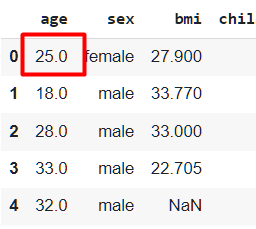

In [89]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,25.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,25.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


In [90]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(3), int

#1.4 Прямое Заполнение Отсутствующих Значений Фрейма Данных

Этот метод заполнит пропущенные значения первым не пропущенным значением, которое встречается перед ним:

In [91]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

In [92]:
dataset1['bmi'].fillna(method='ffill', inplace=True)

In [93]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,22.705,0,NaN,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,22.705,0,NaN,northwest,3866.85520


Теперь пустые значения заполняются ближайшим значением в этой же колонке


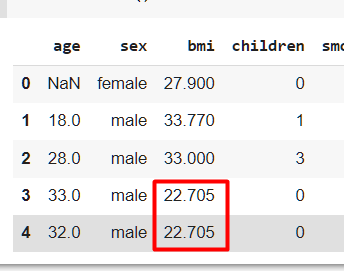

#1.5 Обратное Заполнение Отсутствующих Значений Фрейма Данных

Этот метод будет заполнять пропущенные значения первым не пропущенным значением, которое появляется после него:

In [94]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

In [95]:
dataset1['age'].fillna(method='bfill', inplace=True)

In [96]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,18.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,18.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,NaN,0,NaN,northwest,3866.85520


Теперь пропущенные значения заполняются первым не пропущенным значением, которое появляется после него
 
 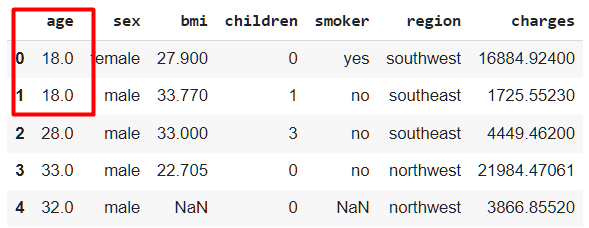

#1.6 Заполните недостающие значения фрейма данных интерполяцией

Наконец, этот метод использует математическую интерполяцию, чтобы определить, какое значение было бы на месте пропущенного значения:

In [97]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

In [98]:
dataset1.interpolate()

,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.9000,0,yes,southwest,16884.92400
1,18.0,male,33.7700,1,no,southeast,1725.55230
2,28.0,male,33.0000,3,no,southeast,4449.46200
3,33.0,male,22.7050,0,no,northwest,21984.47061
4,32.0,male,24.2225,0,NaN,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.9700,3,no,northwest,10600.54830
1334,18.0,female,31.9200,0,no,northeast,2205.98080
1335,18.0,female,36.8500,0,no,southeast,1629.83350
1336,21.0,female,25.8000,0,no,southwest,2007.94500


,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.9000,0,yes,southwest,16884.92400
1,18.0,male,33.7700,1,no,southeast,1725.55230
2,28.0,male,33.0000,3,no,southeast,4449.46200
3,33.0,male,22.7050,0,no,northwest,21984.47061
4,32.0,male,24.2225,0,NaN,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.9700,3,no,northwest,10600.54830
1334,18.0,female,31.9200,0,no,northeast,2205.98080
1335,18.0,female,36.8500,0,no,southeast,1629.83350
1336,21.0,female,25.8000,0,no,southwest,2007.94500


Метод заполнения по интерполяции является наилучшим т.к. пропущенные значения заполняются на основе других данных.

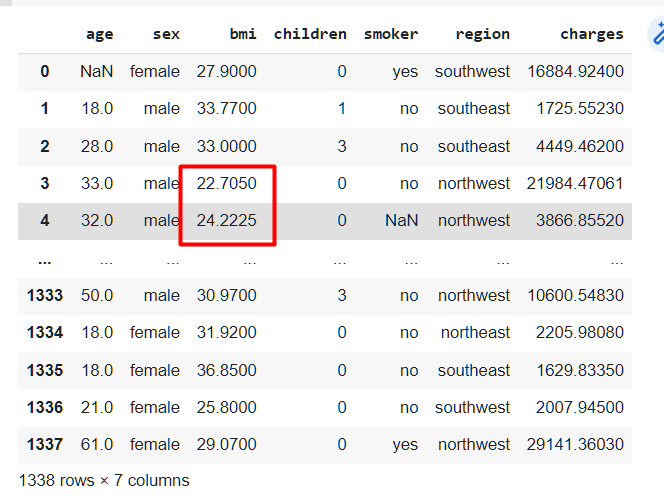

#2. Обработка качественных значений

С помощью функций выше обрабатываются только количественные значения, а качественные остаются пустыми.
Одним из решений такой проблемы является перевод качественных значений в количественные.
Пример: присвоить каждому количественному значению порядковый номер.

In [99]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/1.csv')

dataset2 = pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/2.csv')

dataset3 =pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/3.csv')

In [100]:
#Преобразование качественных признаков в числовой формат 
def transformation(data): 
  columns = data.columns.values.tolist()
  data_num = data.reset_index(drop=True)
  for col in columns:
    if data_num[col].dtype != 'int64':
      if data_num[col].dtype != 'float64':
        new_values = set()
        for row in data_num[col]:
          new_values.add(row)
        dictionary = dict.fromkeys(new_values)
        for i, val in enumerate(dictionary):
          dictionary[val] = i
        for i in range(len(data_num[col])):
          data_num[col][i] = dictionary[data_num[col][i]]
  return data_num

In [101]:
dataset1 = transformation(dataset1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [102]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,NaN,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,NaN,0,1,1,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,NaN,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,NaN,0,1,1,3866.85520


Теперь все качественные значения имееют тип int и заданы в всиде порядковых номеров, которые легко обработать с помощью функций описанных выше

In [103]:
dataset1.interpolate()
dataset1.fillna(method='bfill', inplace=True)

In [104]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,18.0,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,25.740,0,1,1,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,18.0,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,25.740,0,1,1,3866.85520


In [105]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory

Таким образом мы заполнили все пропущенные значения в dataset

In [106]:
dataset2 = transformation(dataset2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [107]:
dataset2.interpolate()
dataset2.fillna(method='bfill', inplace=True)

In [108]:
dataset2.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,1329,19,499,1384,0
1,1.0,1884,17,386,465,3189
2,2.0,1884,17,1638,1091,3810
3,3.0,1993,23,801,1008,819
4,4.0,1181,0,1588,957,423


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,1329,19,499,1384,0
1,1.0,1884,17,386,465,3189
2,2.0,1884,17,1638,1091,3810
3,3.0,1993,23,801,1008,819
4,4.0,1181,0,1588,957,423


In [109]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4999 non-null   float64
 1   description        4999 non-null   int64  
 2   medical_specialty  4999 non-null   int64  
 3   sample_name        4999 non-null   int64  
 4   transcription      4999 non-null   int64  
 5   keywords           4999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4999 non-null   float64
 1   description        4999 non-null   int64  
 2   medical_specialty  4999 non-null   int64  
 3   sample_name        4999 non-null   int64  
 4   transcription      4999 non-null   int64  
 5   keywords   

In [110]:
dataset3 = transformation(dataset3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [111]:
dataset3.interpolate()
dataset3.fillna(method='bfill', inplace=True)

In [112]:
dataset3.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,614,5642903.0,2,100675,5,62.0,49,0.0,1.0,0.0,0.0,0.0,0.0,2
1,55619,5642503.0,0,7954,5,56.0,49,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12851,5642549.0,2,7463,5,62.0,39,0.0,0.0,0.0,0.0,0.0,0.0,2
3,61910,5642828.0,2,1204,5,8.0,68,0.0,0.0,0.0,0.0,0.0,0.0,2
4,9385,5642494.0,2,98304,5,56.0,49,0.0,1.0,1.0,0.0,0.0,0.0,2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,614,5642903.0,2,100675,5,62.0,49,0.0,1.0,0.0,0.0,0.0,0.0,2
1,55619,5642503.0,0,7954,5,56.0,49,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12851,5642549.0,2,7463,5,62.0,39,0.0,0.0,0.0,0.0,0.0,0.0,2
3,61910,5642828.0,2,1204,5,8.0,68,0.0,0.0,0.0,0.0,0.0,0.0,2
4,9385,5642494.0,2,98304,5,56.0,49,0.0,1.0,1.0,0.0,0.0,0.0,2


In [113]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  int64  
 1   AppointmentID   110527 non-null  float64
 2   Gender          110527 non-null  int64  
 3   ScheduledDay    110527 non-null  int64  
 4   AppointmentDay  110527 non-null  int64  
 5   Age             110527 non-null  float64
 6   Neighbourhood   110527 non-null  int64  
 7   Scholarship     110527 non-null  float64
 8   Hipertension    110527 non-null  float64
 9   Diabetes        110527 non-null  float64
 10  Alcoholism      110527 non-null  float64
 11  Handcap         110527 non-null  float64
 12  SMS_received    110527 non-null  float64
 13  No-show         110527 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 11.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 c

# 3. Удаление одинаковых объектов(удаление дубликатов)

Полезно исключать из выборки одинаковые объекты

In [114]:
dataset1.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,18.0,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,25.740,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,2,31.920,0,0,4,2205.98080
1335,18.0,2,36.850,0,0,3,1629.83350
1336,21.0,2,25.800,0,0,2,2007.94500


,age,sex,bmi,children,smoker,region,charges
0,18.0,2,27.900,0,2,2,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,25.740,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,2,31.920,0,0,4,2205.98080
1335,18.0,2,36.850,0,0,3,1629.83350
1336,21.0,2,25.800,0,0,2,2007.94500


In [115]:
dataset2.drop_duplicates()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,1329,19,499,1384,0
1,1.0,1884,17,386,465,3189
2,2.0,1884,17,1638,1091,3810
3,3.0,1993,23,801,1008,819
4,4.0,1181,0,1588,957,423
...,...,...,...,...,...,...
4994,4994.0,1402,19,1063,1099,0
4995,4995.0,486,19,900,2088,969
4996,4996.0,1645,19,1146,205,0
4997,4997.0,2257,19,1203,980,0


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0.0,1329,19,499,1384,0
1,1.0,1884,17,386,465,3189
2,2.0,1884,17,1638,1091,3810
3,3.0,1993,23,801,1008,819
4,4.0,1181,0,1588,957,423
...,...,...,...,...,...,...
4994,4994.0,1402,19,1063,1099,0
4995,4995.0,486,19,900,2088,969
4996,4996.0,1645,19,1146,205,0
4997,4997.0,2257,19,1203,980,0


In [116]:
dataset3.drop_duplicates()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,614,5642903.0,2,100675,5,62.0,49,0.0,1.0,0.0,0.0,0.0,0.0,2
1,55619,5642503.0,0,7954,5,56.0,49,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12851,5642549.0,2,7463,5,62.0,39,0.0,0.0,0.0,0.0,0.0,0.0,2
3,61910,5642828.0,2,1204,5,8.0,68,0.0,0.0,0.0,0.0,0.0,0.0,2
4,9385,5642494.0,2,98304,5,56.0,49,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,51813,5651768.0,2,68881,23,56.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110523,13290,5650093.0,2,58115,23,51.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110524,11926,5630692.0,2,102143,23,21.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110525,12890,5630323.0,2,30812,23,38.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,614,5642903.0,2,100675,5,62.0,49,0.0,1.0,0.0,0.0,0.0,0.0,2
1,55619,5642503.0,0,7954,5,56.0,49,0.0,0.0,0.0,0.0,0.0,0.0,2
2,12851,5642549.0,2,7463,5,62.0,39,0.0,0.0,0.0,0.0,0.0,0.0,2
3,61910,5642828.0,2,1204,5,8.0,68,0.0,0.0,0.0,0.0,0.0,0.0,2
4,9385,5642494.0,2,98304,5,56.0,49,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,51813,5651768.0,2,68881,23,56.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110523,13290,5650093.0,2,58115,23,51.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110524,11926,5630692.0,2,102143,23,21.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
110525,12890,5630323.0,2,30812,23,38.0,15,0.0,0.0,0.0,0.0,0.0,1.0,2
